In [15]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd

from text_classification.utils.train_evaluate import Trainer
from text_classification.models.base import BaseModel
from text_classification.data_ag_news.data.data_process_glove import DataProcess

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dp = DataProcess('../datasets/train.csv', '../datasets/test.csv', device)
train_loader, test_loader = dp.get_dataLoader(141)
pre_vector = dp.get_pre_trained("glove.6B.50d.txt", '../../extra/glove_vector/')

model = BaseModel(pre_vector, 4).to(device)
# 冻结embedding层参数
for name, param in model.named_parameters():
    if "embedding" in name:
        param.requires_grad = False

epochs = 10
lr = 1
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=3)

In [17]:
def compute_metrics_f1(predict_all, y_true):
    """计算模型f1 score"""
    predict = predict_all.argmax(-1)
    label = y_true
    acc = f1_score(label, predict, average='micro')
    return {"f1": acc}


t_and_v = Trainer(model=model, optimizer=optimizer, criterion=criterion, epochs=epochs)

metric_result = t_and_v.train(train_loader=train_loader, valid_loader=test_loader, compute_metrics=compute_metrics_f1)
metric_result_df = pd.DataFrame(metric_result)
metric_result_df.index.name = 'epoch'
metric_result_df

Train Epoch: 0  [0    /120000 (0  %)]	Loss: 1.403881	f1: 0.312500
Train Epoch: 0  [320  /120000 (0  %)]	Loss: 1.106484	f1: 0.562500
Train Epoch: 0  [640  /120000 (1  %)]	Loss: 0.988278	f1: 0.687500
Train Epoch: 0  [960  /120000 (1  %)]	Loss: 0.879972	f1: 0.812500
Train Epoch: 0  [1280 /120000 (1  %)]	Loss: 0.986229	f1: 0.687500
Train Epoch: 0  [1600 /120000 (1  %)]	Loss: 0.568751	f1: 0.875000
Train Epoch: 0  [1920 /120000 (2  %)]	Loss: 0.484340	f1: 0.875000
Train Epoch: 0  [2240 /120000 (2  %)]	Loss: 0.537401	f1: 0.750000
Train Epoch: 0  [2560 /120000 (2  %)]	Loss: 0.777541	f1: 0.625000
Train Epoch: 0  [2880 /120000 (2  %)]	Loss: 0.704748	f1: 0.812500
Train Epoch: 0  [3200 /120000 (3  %)]	Loss: 0.594100	f1: 0.812500
Train Epoch: 0  [3520 /120000 (3  %)]	Loss: 0.313904	f1: 1.000000
Train Epoch: 0  [3840 /120000 (3  %)]	Loss: 0.533599	f1: 0.812500
Train Epoch: 0  [4160 /120000 (3  %)]	Loss: 0.759503	f1: 0.625000
Train Epoch: 0  [4480 /120000 (4  %)]	Loss: 0.315758	f1: 0.937500
Train Epoc

,Training loss,Training f1,Validation loss,Validation f1
epoch,,,,
0,0.383852,0.872425,0.393215,0.871447
1,0.384579,0.877275,0.392967,0.872500
2,0.395830,0.870467,0.404326,0.870132
3,0.400973,0.863717,0.409436,0.857237
4,0.390443,0.876567,0.399846,0.873816
5,0.387795,0.869767,0.399195,0.863684
6,0.397987,0.872958,0.407427,0.866842
7,0.376620,0.875933,0.386648,0.871579
8,0.379842,0.873300,0.389140,0.868947


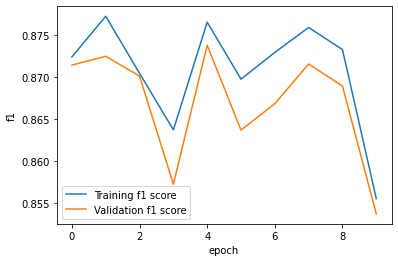

In [18]:
plt.plot(metric_result['Training f1'], label='Training f1 score')
plt.plot(metric_result['Validation f1'], label='Validation f1 score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend()
plt.show()